In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os, sys, shutil

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import Isomap as ISM
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [2]:
from glob import glob

In [3]:
print(os.getcwd())

/home/asus/Documents/git/Stomach-Status-Classification/Publish Paper/Result Analytics


In [4]:
for i in range(2):
    os.chdir("..")
print(os.getcwd())

/home/asus/Documents/git/Stomach-Status-Classification


In [5]:
print(os.listdir(os.getcwd()))

['Reference', 'Utils', 'README.md', 'Process.pptx', 'Data Exploration', '.gitattributes', '.gitignore', 'LICENSE.md', 'Publish Paper', 'Data set', '.git', 'make_environment.py', 'Data Preprocessing', 'Experiment']


In [6]:
os.listdir(os.getcwd() + "/Data set")

['DL_data',
 'Original Form',
 'Seg_Task_Data',
 'kmean_dataset2-8',
 'spc_dataset',
 'kmean_dataset']

In [7]:
data_dir = os.getcwd() + "/Data set/kmean_dataset"
print(os.listdir(data_dir))

['10cv_10', '10cv_64', '10cv_32', '10cv_512', '10cv_128', '10cv_1024', '10cv_256', 'sift_train_0_3_0.04_10_1.6.csv']


# SIFT 

## 64

In [8]:
sift_64 = glob(data_dir + "/10cv_64/sift_train_*")
print(sift_64)

['/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index9.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index1.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index8.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index0.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index2.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index4.csv', '/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/sift_train_0_3_0.04_10_1.6histo_64_cv_index7.csv', '/home/asus/Documents/git/Stomach

In [9]:
test_df = pd.read_csv(sift_64[0])
test_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,56,57,58,59,60,61,62,63,64,65
0,0,CHGastro_Abnormal_102.png,0.011082,0.025859,0.022165,0.007388,0.022165,0.022165,0.014776,0.007388,...,0.007388,0.025859,0.007388,0.022165,0.007388,0.007388,0.014776,0.003694,0.018470,1
1,1,CHGastro_Abnormal_066.png,0.008259,0.011563,0.024777,0.019822,0.023126,0.018170,0.011563,0.008259,...,0.016518,0.006607,0.009911,0.019822,0.018170,0.000000,0.018170,0.008259,0.019822,1
2,2,CHGastro_Abnormal_038.png,0.028735,0.006631,0.013262,0.024314,0.013262,0.013262,0.022104,0.033156,...,0.035366,0.011052,0.008842,0.004421,0.041998,0.000000,0.019894,0.013262,0.011052,1
3,3,CHGastro_Abnormal_033.png,0.018825,0.012102,0.016808,0.006051,0.012774,0.011429,0.032271,0.026893,...,0.010757,0.020842,0.023531,0.016136,0.014119,0.010085,0.028910,0.022187,0.008068,1
4,4,CHGastro_Abnormal_051.png,0.010168,0.010168,0.015714,0.020336,0.011092,0.016639,0.022185,0.013865,...,0.014790,0.017563,0.016639,0.025882,0.009244,0.012941,0.018487,0.024958,0.016639,1


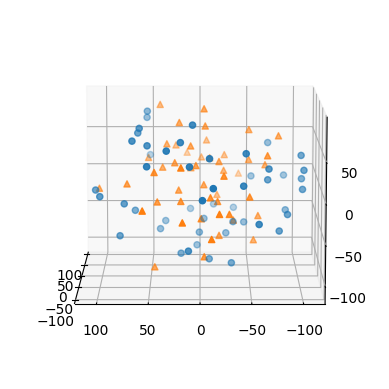

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for idx, file in enumerate(sift_64[2:3]):
    df = pd.read_csv(file).drop(["Unnamed: 0"], axis = 1).sort_values(by=['65'])
    data = df.iloc[:, 1:-2]
    label = df.iloc[:, -1].value_counts().values
    pca_data = TSNE(n_components=3).fit_transform(data)
    ax.scatter3D(pca_data[:label[1], 0], pca_data[:label[1], 1], pca_data[:label[1], 2], marker = "o")
    ax.scatter3D(pca_data[label[0]:, 0], pca_data[label[0]:, 1], pca_data[label[0]:, 2], marker = "^")
    ax.view_init(elev=10., azim=-180)

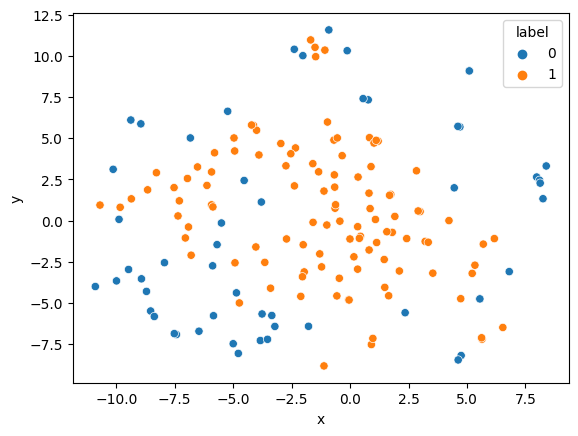

In [11]:
for idx, file in enumerate(sift_64[:1]):
    df = pd.read_csv(file).drop(["Unnamed: 0"], axis = 1)
    data = df.iloc[:, 1:-2]
    label = df.iloc[:, -1]
    pca_data = TSNE(n_components=2).fit_transform(data)
    pca_df = pd.DataFrame(pca_data, columns = ["x", "y"])
    pca_df["label"] = label
    sns.scatterplot(data=pca_df, x = "x", y = "y", hue="label")

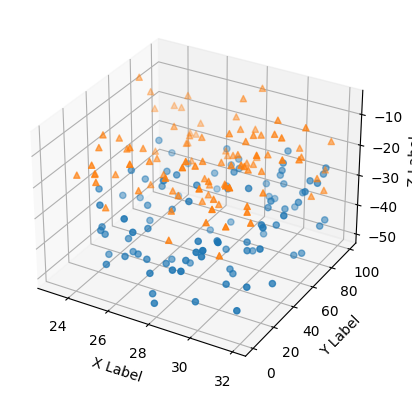

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# 2D & 3D

In [13]:
print(os.getcwd())

/home/asus/Documents/git/Stomach-Status-Classification


In [14]:
result_dir = os.getcwd() + "/Publish Paper/Result Analytics/10fold91"
print(os.listdir(result_dir))

['3d', 're1.csv', '2d', 'js2csv.py', 'extract_result.py']


In [15]:
d2_dir = result_dir + "/2d"
d3_dir = result_dir + "/3d"

for x in [d2_dir, d3_dir]:
    if not os.path.exists(x):
        os.mkdir(x)

In [16]:
print(os.listdir(result_dir))

['3d', 're1.csv', '2d', 'js2csv.py', 'extract_result.py']


In [17]:
datas = glob(data_dir + "/*/*_train_*_index2.csv")
print(datas[1])

/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/brisk_train_30_3_1.0histo_64_cv_index2.csv


In [18]:
for x in datas:
    if "surf" in x:
        print(x)

/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/surf_train_0_4_3_True_Falsehisto_64_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/surf_train_100_4_3_True_Falsehisto_64_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/surf_train_50_4_3_True_Falsehisto_64_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_64/surf_train_400_4_3_True_Falsehisto_64_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_512/surf_train_50_4_3_True_Falsehisto_512_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_512/surf_train_0_4_3_True_Falsehisto_512_cv_index2.csv
/home/asus/Documents/git/Stomach-Status-Classification/Data set/kmean_dataset/10cv_128/surf_train_400_4_3_True_Falsehisto_128_cv_index2.csv
/home/asus/Documents/git/Stomach-S

In [19]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()

# for path in datas:
# #     ax = Axes3D(fig)
#     plt.subplot(5,5,i+1)
    
#     name_split = path.split("/")
#     algo = name_split[-1].split("_")[0]
#     dimen = int(name_split[-2].split("_")[-1])
    
#     df = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1).sort_values(by=[f'{dimen+1}'])
#     data = df.iloc[:, 1:-1]
# #     label = df.iloc[:, -1].value_counts().values
#     label = df.iloc[:, -1]
#     pca_data = TSNE(n_components=2).fit_transform(data)
# #     ax.scatter(pca_data[:label[1], 0], pca_data[:label[1], 1], pca_data[:label[1], 2], marker = "o")
# #     ax.scatter(pca_data[label[0]:, 0], pca_data[label[0]:, 1], pca_data[label[0]:, 2], marker = "^")
    
# #     for ii in range(0,360,90):
# #         ax.view_init(elev=10., azim=ii)
# # #         savefig("movie%d.png" % ii)
    
#     pca_df = pd.DataFrame(pca_data, columns = ["x", "y"])
#     pca_df["label"] = label
#     sns.jointplot(data=pca_df, x = "x", y = "y", hue="label", kind = "kde")
#     plt.axis("off")
    
#     plt.savefig(d2_dir + f"/{algo}_{dimen}", 
#                 bbox_inches='tight', 
#                 # format = 'jpg', 
#                 pad_inches = 0)
    
#     fig.clear()
#     plt.close(fig)
#     ax.clear()
#     plt.cla()
#     plt.close("all")

In [20]:
from mpl_toolkits.mplot3d import Axes3D
    
for path in datas:
    fig = plt.figure()
    ax = Axes3D(fig)
    
    name_split = path.split("/")
    algo = name_split[-1].split("_")[0]
    dimen = int(name_split[-2].split("_")[-1])
    if algo == "surf":
        algo += name_split[-1].split("_")[2]
    
    df = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1).sort_values(by=[f'{dimen+1}'])
    data = df.iloc[:, 1:-1]
#     label = df.iloc[:, -1].value_counts().values
    label = df.iloc[:, -1]
    pca_data = TSNE(n_components=2).fit_transform(data)
#     ax.scatter(pca_data[:label[1], 0], pca_data[:label[1], 1], pca_data[:label[1], 2], marker = "o")
#     ax.scatter(pca_data[label[0]:, 0], pca_data[label[0]:, 1], pca_data[label[0]:, 2], marker = "^")
    
#     for ii in range(0,360,90):
#         ax.view_init(elev=10., azim=ii)
# #         savefig("movie%d.png" % ii)
    
    pca_df = pd.DataFrame(pca_data, columns = ["x", "y"])
    pca_df["label"] = label
    sns.jointplot(data=pca_df, x = "x", y = "y", hue="label", kind = "kde")
#     plt.axis("off")
    
    plt.savefig(d2_dir + f"/{algo}_{dimen}", 
                bbox_inches='tight', 
                # format = 'jpg', 
                pad_inches = 0)
    
    fig.clear()
    plt.close(fig)
    ax.clear()
    plt.cla()
    plt.close("all")

<class 'pandas.core.frame.DataFrame'>
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


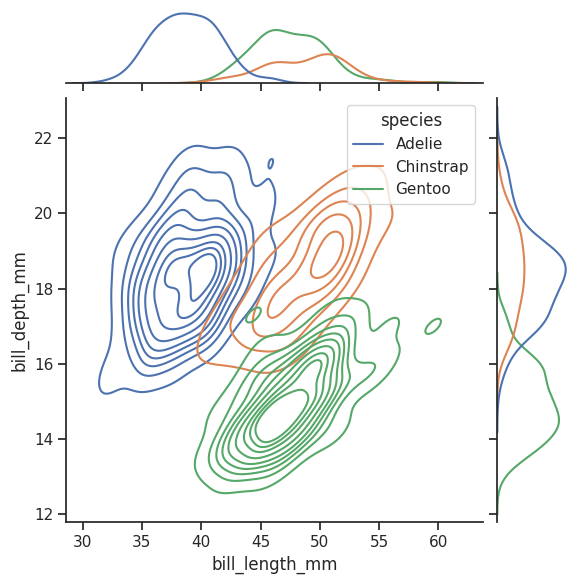

In [77]:
# test

import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
print(type(penguins))
print(penguins.head())

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

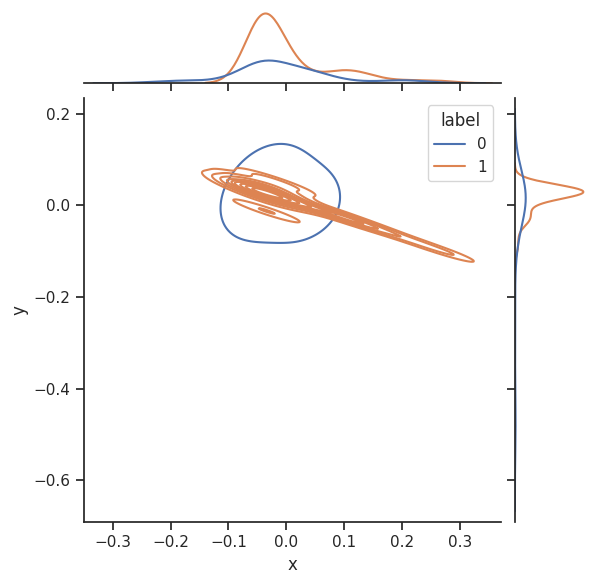

In [91]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.decomposition import TruncatedSVD as SVD
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.manifold import Isomap as ISM
# from sklearn.manifold import LocallyLinearEmbedding as LLE


for idx, file in enumerate(sift_64[:1]):
    df = pd.read_csv(file).drop(["Unnamed: 0"], axis = 1)
    data = df.iloc[:, 1:-2]
    label = df.iloc[:, -1]
    pca_data = LLE(n_components=2).fit_transform(data)
    pca_df = pd.DataFrame(pca_data, columns = ["x", "y"])
    pca_df["label"] = label
    sns.jointplot(data=pca_df, x = "x", y = "y", hue="label", kind = "kde")

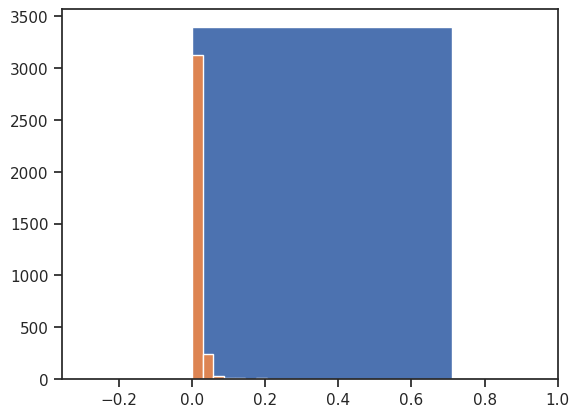

In [89]:
plt.figure()
for idx, file in enumerate(sift_64[:1]):
    df = pd.read_csv(file).drop(["Unnamed: 0"], axis = 1).sort_values(by=["65"])
    data = df.iloc[:, 1:-2]
    label = df.iloc[:, -1].value_counts().values
#     pca_data = TSNE(n_components=2).fit_transform(data)
#     pca_df = pd.DataFrame(pca_data, columns = ["x", "y"])
#     pca_df["label"] = label
#     sns.jointplot(data=pca_df, x = "x", y = "y", hue="label", kind = "kde")
    data1 = data.iloc[:label[1], :].values.flatten()
    data2 = data.iloc[label[0]:, :].values.flatten()
    
    plt.hist(data1)
    plt.hist(data2)
    plt.xlim(right=1)  